# ML Application Example
## Regression

The task of this example is to implement a complete Data Driven pipeline (load, data-analysis, visualisation, model selection and optimization, prediction) on a specific Dataset. In this example the challenge is to perform a regression with different models to find the most accurate prediction.  


## Dataset 
The notebook will upload a public available dataset: https://archive.ics.uci.edu/ml/datasets/energy+efficiency
<blockquote>
  <b>Source:</b>
    The dataset was created by Angeliki Xifara (angxifara@gmail.com, Civil/Structural Engineer) and was processed by Athanasios    
    Tsanas (tsanasthanasis@gmail.com, Oxford Centre for Industrial and Applied Mathematics, University of Oxford, UK).
    <br/>
    <b>Data Set Information:</b>
    The author of the dataset perform energy analysis using 12 different building shapes simulated in Ecotect. The buildings differ with 
    respect to the glazing area, the glazing area distribution, and the orientation, amongst other parameters. They simulate various 
    settings as functions of the afore-mentioned characteristics to obtain 768 building shapes. The dataset comprises 768 samples and 8 
    features, aiming to predict two real valued responses. It can also be used as a multi-class classification problem if the response 
    is rounded to the nearest integer.
    <br/>
    <b>Attribute Information:</b>
    The dataset contains eight attributes (or features, denoted by X1...X8) and two responses (or outcomes, denoted by y1 and y2). The 
    aim is to use the eight features to predict each of the two responses.
    <br/>
    <b>Specifically:</b>
    <br/>
    <code><br/> X1 :: Relative Compactness <br/> X2 :: Surface Area <br/> X3 :: Wall Area <br/> X4 :: Roof Area </code>
    <code><br/> X5 :: Overall Height <br/> X6 :: Orientation <br/> X7 :: Glazing Area <br/> X8 :: Glazing Area Distribution </code>
    <code><br/> y1 :: Heating Load <br/> y2 :: Cooling Load </code>
    <br/>
</blockquote>

In [4]:
# algebra
import numpy as np
# data structure
import pandas as pd
# data visualization
import matplotlib.pylab as plt
import seaborn as sns
#file handling
from pathlib import Path


# Data load
The process consist in downloading the data if needed, loading the data as a Pandas dataframe

In [7]:
    
filename  = "ENB2012_data.xlsx"
separator = ';'
columns   = None

#if the dataset is not already in the working dir, it will download
my_file = Path(filename)
if not my_file.is_file():
    print("Downloading dataset")
    !wget https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx




In [9]:
#function to semplificate the load of dataset, in case it is a csv, tsv or excel file
#output is a pandas dataframe 
def load_csv(filename,separator,columns):
    
    try:
    
        csv_table = pd.read_csv(filename,sep=separator,names=columns)
    
    except:
        
        csv_table = pd.read_excel(filename,names=columns)
    print("n. samples: {}".format(csv_table.shape[0]))
    print("n. columns: {}".format(csv_table.shape[1]))

    return csv_table #.dropna()

data = load_csv(filename,separator,columns)

n. samples: 768
n. columns: 10


# Data Analysis and Visualization
In this section confidence with the data is gained, data are plotted and cleaned

In [4]:
#How does the dataset look like? 
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [10]:
#Name of all columns
print(data.columns.values)

['X1' 'X2' 'X3' 'X4' 'X5' 'X6' 'X7' 'X8' 'Y1' 'Y2']


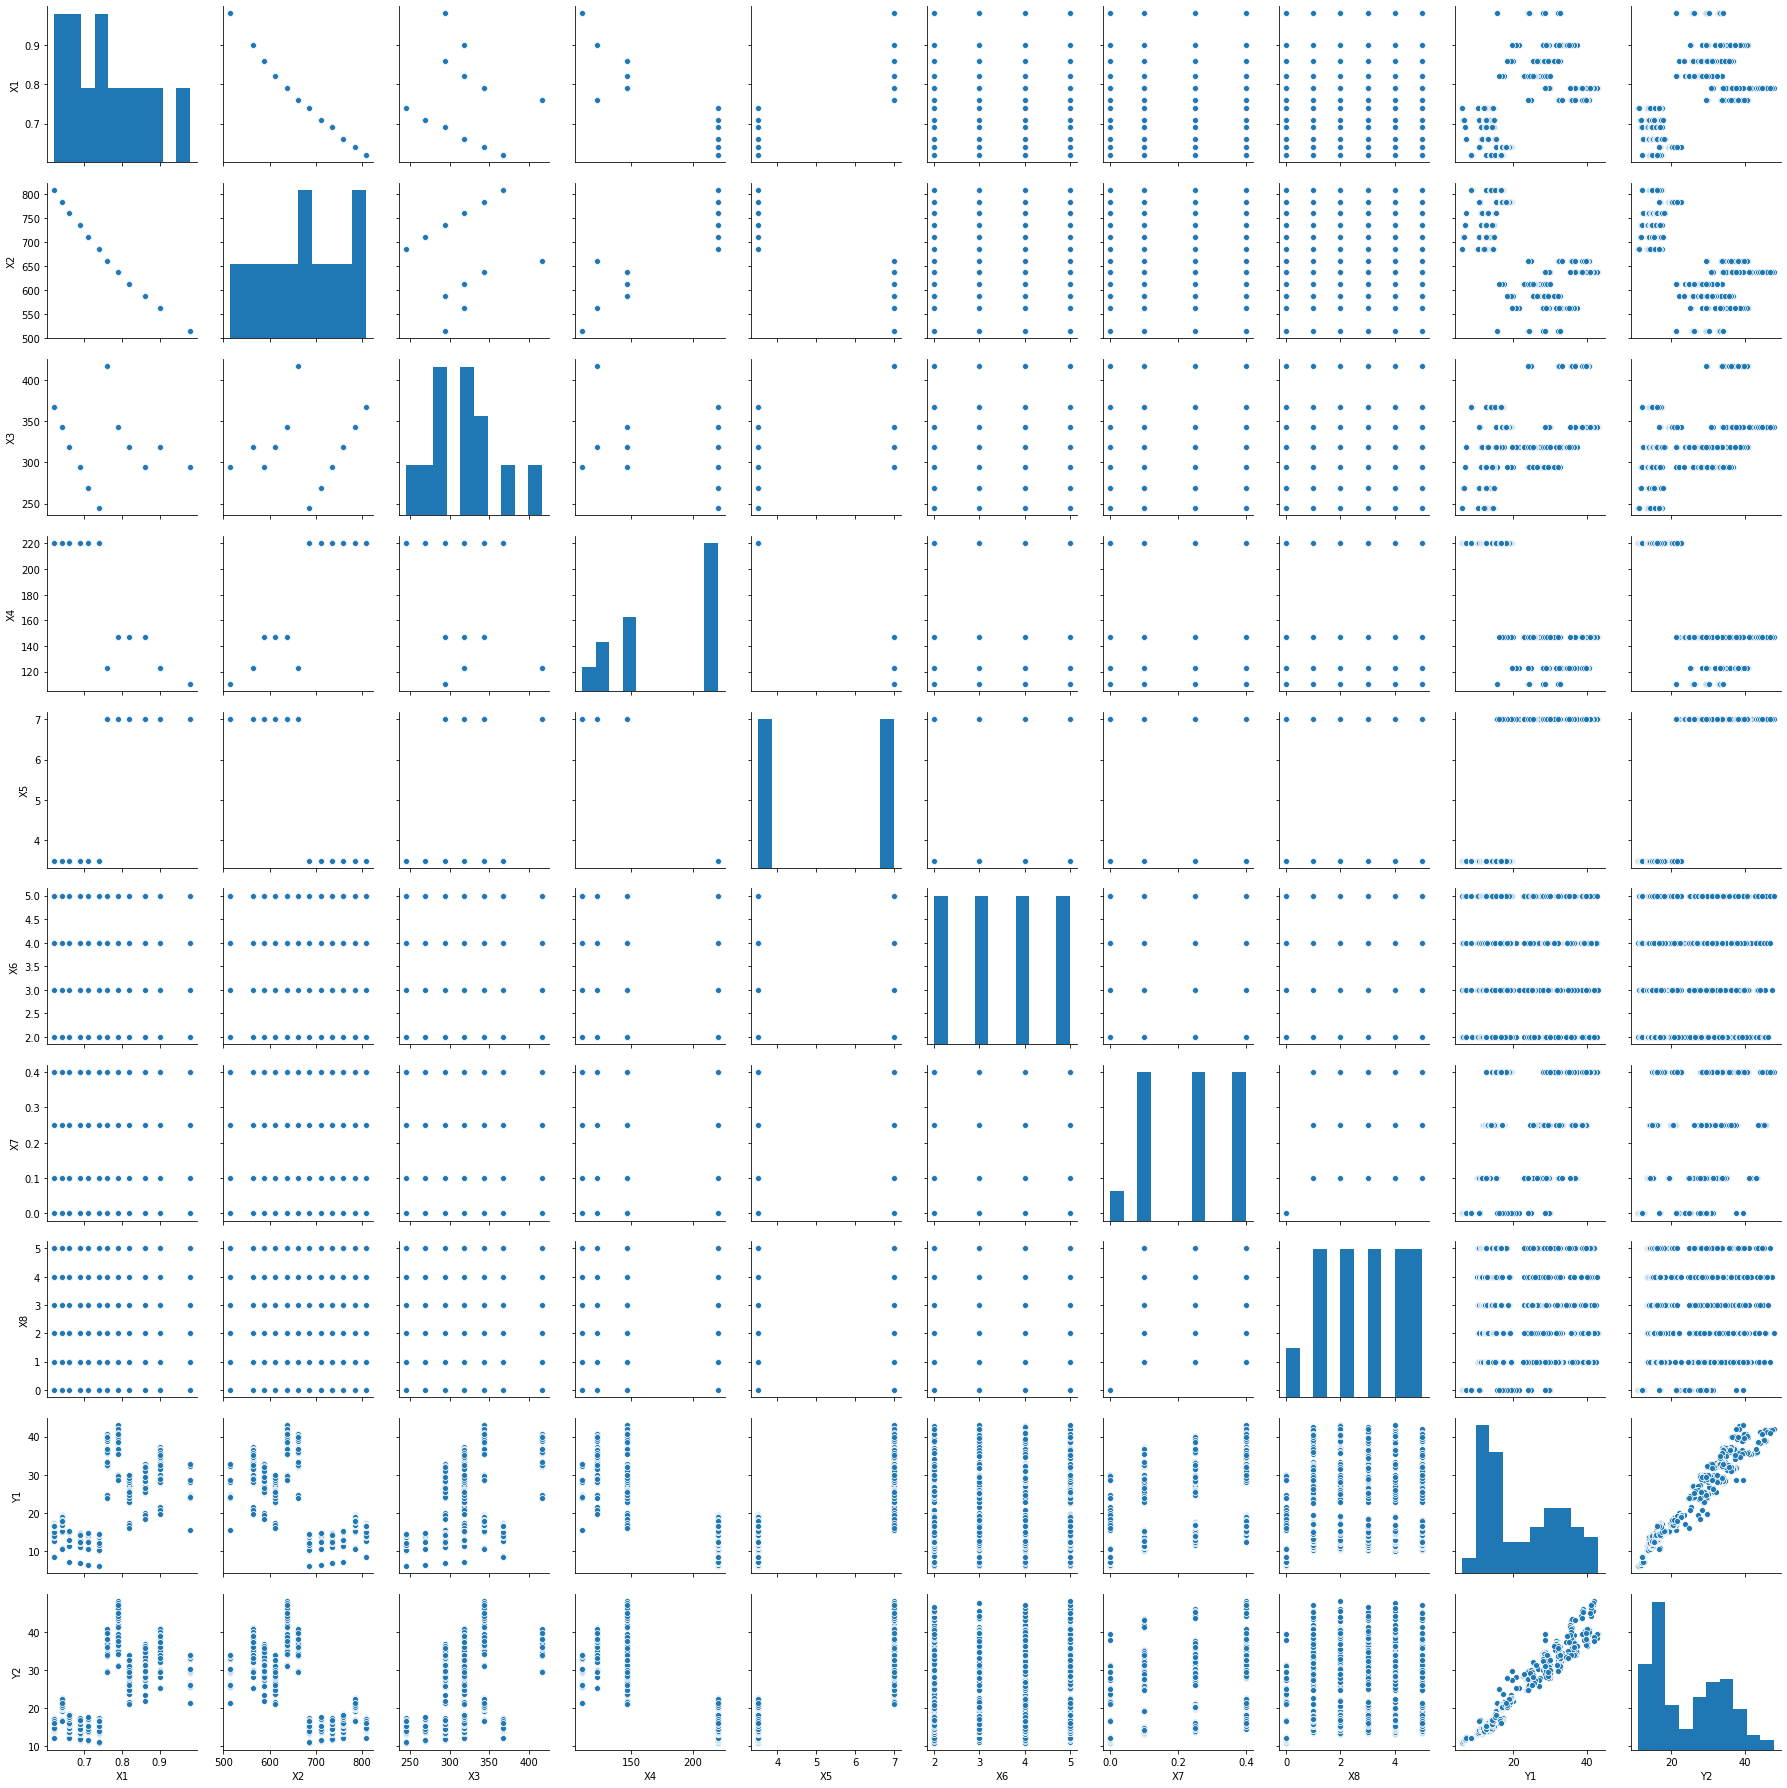

In [6]:
#let's have a look at the data and their correlations, if any
sns.pairplot(data)

In [11]:
#Select only the interesting variable for the model, and remove any anomalous value (e.g."nan")
data = data[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8' ,'Y1', 'Y2']]
data = data.dropna()

# Machine Learning
Here the interesting input features and output to predict for the task are selected, the data are opportunelly preprocessed (i.e. normalized),  

In [9]:
#the module needed for the modeling and data mining are imported
#Cross-Validation 
from sklearn.model_selection import train_test_split
#Data normalization
from sklearn.preprocessing   import StandardScaler
#metrics to evaluate the model
from sklearn.metrics import mean_squared_error

In [10]:
print("Data columns: {}".format(data.columns.values))

Data columns: ['X1' 'X2' 'X3' 'X4' 'X5' 'X6' 'X7' 'X8' 'Y1' 'Y2']


In [11]:
input_features = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']
output         = ['Y1']
test_size      = 0.33
random_state   = 0

In [12]:
unnormalized_X,unnormalized_y = data[input_features],data[output]

In [13]:
# normalisation
scaler_X = StandardScaler().fit(unnormalized_X)
scaler_y = StandardScaler().fit(unnormalized_y)
X = scaler_X.transform(unnormalized_X)
y = scaler_y.transform(unnormalized_y)

In [14]:
#check if nan are present on the data after normalization to avoid trouble later
sum(np.isnan(X))

array([0, 0, 0, 0, 0, 0, 0, 0])

In [15]:
# basic train-test split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=test_size,
                                                    random_state=random_state)

## Basic linear model

In [16]:
from sklearn import linear_model

[[-0.59027331 -0.32320016  0.09276907 -0.35996845  0.71542956 -0.01371795
   0.25749986  0.0290825 ]]
[0.00082045]


Text(0, 0.5, 'pred')

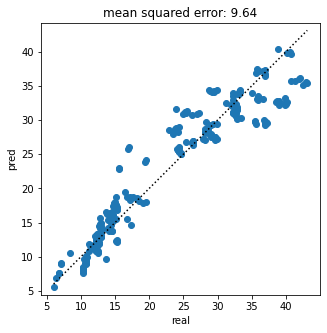

In [17]:
basic_linear_model = linear_model.LinearRegression()
basic_linear_model.fit(X_train,y_train)
print(basic_linear_model.coef_)
print(basic_linear_model.intercept_)

pred_normalized_y_test = basic_linear_model.predict(X_test)
pred_y_test            = scaler_y.inverse_transform(pred_normalized_y_test)
real_y_test            = scaler_y.inverse_transform(y_test)

mse_score = mean_squared_error(real_y_test,pred_y_test)

plt.figure(figsize=[5,5])
plt.scatter(real_y_test,pred_y_test)
plt.plot([real_y_test.min(),real_y_test.max()],[real_y_test.min(),real_y_test.max()],'k:')
plt.axis('equal')
plt.title("mean squared error: {:.2f}".format(mse_score))

plt.xlabel('real')
plt.ylabel('pred')

# Ridge
It performs regularization.

In [18]:
# regulatization hyper-parameter
alpha = 10

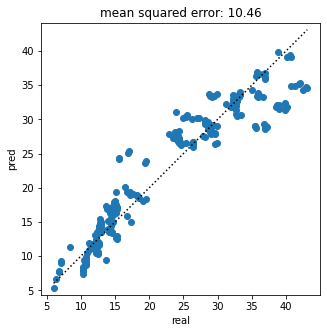

In [19]:
def fit_predict_plot(model,X_train,y_train,X_test,y_test):
    model.fit(X_train,y_train.ravel())

    pred_normalized_y_test = model.predict(X_test)
    pred_y_test            = scaler_y.inverse_transform(pred_normalized_y_test)
    real_y_test            = scaler_y.inverse_transform(y_test)

    mse_score = mean_squared_error(real_y_test,pred_y_test)

    plt.figure(figsize=[5,5])
    plt.scatter(real_y_test,pred_y_test)
    plt.plot([real_y_test.min(),real_y_test.max()],[real_y_test.min(),real_y_test.max()],'k:')
    plt.axis('equal')
    plt.title("mean squared error: {:.2f}".format(mse_score))
    plt.xlabel('real')
    plt.ylabel('pred')

    return model,mse_score

model = linear_model.Ridge(alpha=alpha)
linear_ridge_model,linear_ridge_score = fit_predict_plot(model,X_train,y_train,X_test,y_test)

# Lasso
It performs variable selection.

In [20]:
# regulatization hyper-parameter
alpha = 0.1

array([ 0.        , -0.        ,  0.14580579, -0.        ,  0.74346546,
       -0.        ,  0.16888611,  0.        ])

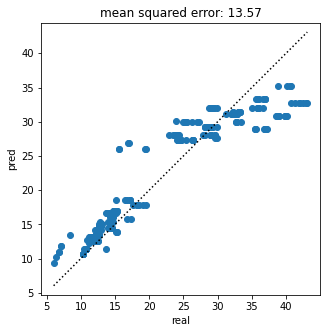

In [21]:
model = linear_model.Lasso(alpha=alpha)
linear_lasso_model,linear_lasso_score = fit_predict_plot(model,X_train,y_train,X_test,y_test)
linear_lasso_model.coef_

# Kenel ridge

In [22]:
from sklearn.kernel_ridge import KernelRidge

In [23]:
# regulatization hyper-parameter
alpha  = 0.01
kernel = 'rbf'#'polynomial'

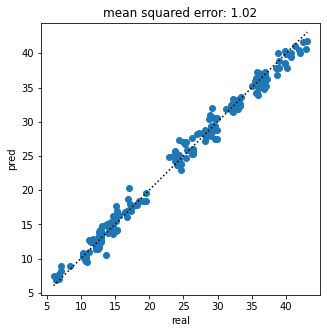

In [24]:
model = KernelRidge(alpha=alpha,kernel = kernel)
kernal_ridge_model,kernel_ridge_score = fit_predict_plot(model,X_train,y_train,X_test,y_test)

# Support Vector Machines

In [25]:
from sklearn.svm import SVR

In [26]:
# hyper-parameter
C = 100
kernel='rbf'

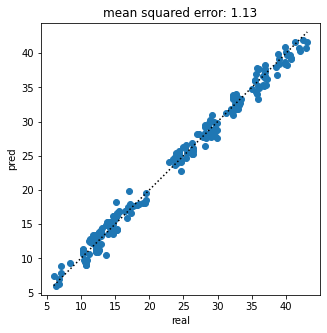

In [28]:
model = SVR(C=C,kernel=kernel,gamma='auto')
svr_model,svr_score = fit_predict_plot(model,X_train,y_train,X_test,y_test)

# Random Forest

In [29]:
from sklearn.ensemble import RandomForestRegressor

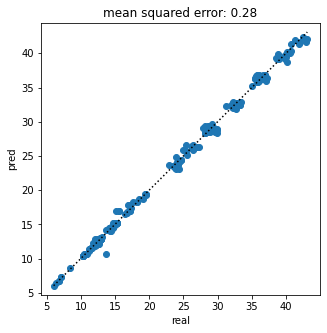

In [40]:
model = RandomForestRegressor(n_estimators=100)
random_forest_model,random_forest_score = fit_predict_plot(model,X_train,y_train,X_test,y_test)

# With Model Selection using Cross Validation

{'alpha': 0.01}


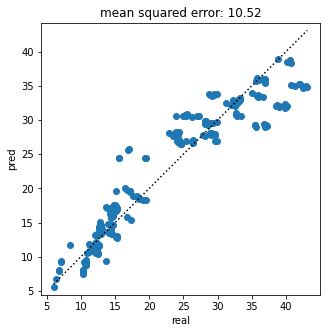

In [44]:
from sklearn.model_selection import GridSearchCV

cv = 5
estimator  = linear_model.Lasso()
parameters = {'alpha':np.logspace(-2,2,5)}
model = GridSearchCV(estimator, parameters,cv=cv)

cv_lasso_model,cv_lasso_linear_score = fit_predict_plot(model,X_train,y_train,X_test,y_test)
print(cv_lasso_model.best_params_)

{'alpha': 0.1}


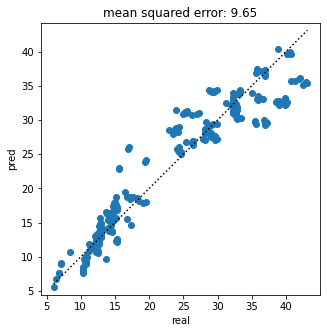

In [53]:
cv = 5
estimator  = linear_model.Ridge()
parameters = {'alpha':np.logspace(-2,2,5)}
model = GridSearchCV(estimator, parameters,cv=cv)

model,model_score = fit_predict_plot(model,X_train,y_train,X_test,y_test)
print(model.best_params_)

{'alpha': 0.01, 'degree': 4, 'kernel': 'polynomial'}


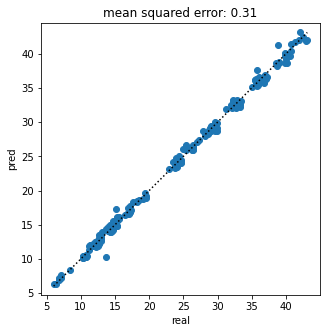

In [54]:
cv = 5
estimator  = KernelRidge()
parameters = {'kernel':['polynomial','rbf'],
              'degree':np.arange(10),
              'alpha':np.logspace(-2,2,5)}
model = GridSearchCV(estimator, parameters,cv=cv)

model,model_score = fit_predict_plot(model,X_train,y_train,X_test,y_test)
print(model.best_params_)

{'C': 100.0, 'kernel': 'rbf'}


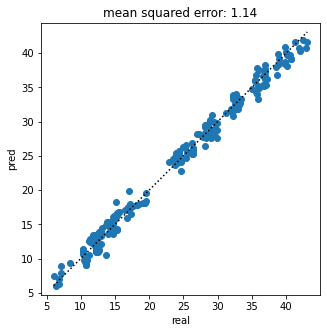

In [55]:
cv = 5
estimator  = SVR()
parameters = {'kernel':['rbf'],
              'C':np.logspace(-2,2,5)}
model = GridSearchCV(estimator, parameters)

model,model_score = fit_predict_plot(model,X_train,y_train,X_test,y_test)
print(model.best_params_)

{'n_estimators': 1000}


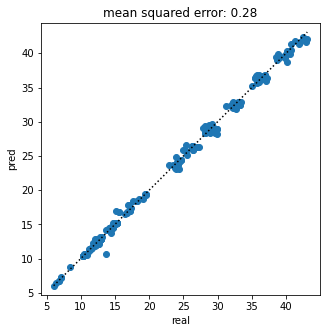

In [56]:
cv = 5
estimator  = RandomForestRegressor()
parameters = {'n_estimators':[10,100,1000]}
model = GridSearchCV(estimator, parameters)

model,model_score = fit_predict_plot(model,X_train,y_train,X_test,y_test)
print(model.best_params_)